This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.QuadratureOrder2D = 8      # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0              # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.beta = 1.0e6               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False           # PSI SOLUTION AITKEN RELAXATION SWITCH
Equilibrium.lambda0 = 0.3              # INITIAL AIKITEN'S RELAXATION PARAMETER
Equilibrium.PHIrelax = False           # PHI LEVEL-SET AITKEN RELAXATION SWITCH
Equilibrium.alphaPHI = 0.5             # PHI LEVEL-SET AITKEN RELAXATION INITIAL PARAMETER 
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY


Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



In [2]:
print("     -> INITIALISE SIMULATION PARAMETERS...", end="")
Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()
print('Done!')

     -> INITIALISE SIMULATION PARAMETERS...Done!


In [3]:
### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH

###### QUADRATIC TRIANGULAR ELEMENT MESH
MESH = 'TRI06-SUPERFINE-ITER'
#MESH = 'TRI06-MEGAFINE-ITER'

# RECTANGULAR MESH
#MESH = 'TRI03-FINE-RECTANGLE'
#MESH = 'TRI06-MEDIUM-RECTANGLE'

#MESH = 'TRI10-MEGAFINE-LINEAR'

Equilibrium.InitialiseMESH(MESH)

INITIALISE MESH...
     -> READ MESH FILES...Done!


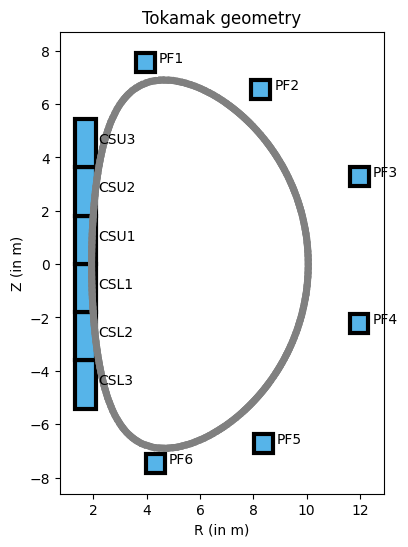

In [4]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS WITH QUADRILATERAL COILS
# COILS
coil1 = QuadrilateralCoil(name = 'PF1',
                          Itotal = 5.73e6,
                          Xcenter = np.array([3.9431,7.5741]),
                          Area = 0.5)
coil2 = QuadrilateralCoil(name = 'PF2',
                          Itotal= -2.88e6,
                          Xcenter = np.array([8.2851,6.5398]),
                          Area = 0.5)
coil3 = QuadrilateralCoil(name = 'PF3',
                          Itotal= -5.81e6,
                          Xcenter = np.array([11.9919,3.2752]),
                          Area = 0.5)
coil4 = QuadrilateralCoil(name = 'PF4',
                          Itotal= -4.78e6,
                          Xcenter = np.array([11.9630,-2.2336]),
                          Area = 0.5)
coil5 = QuadrilateralCoil(name = 'PF5',
                          Itotal= -7.81e6,
                          Xcenter = np.array([ 8.3908,-6.7269]),
                          Area = 0.5)
coil6 = QuadrilateralCoil(name = 'PF6',
                          Itotal= 16.94e6,
                          Xcenter = np.array([4.3340, -7.4665]),
                          Area = 0.5)
   
# QUADRILATERAL CROSS-SECTION SOLENOIDS
solewidth = 0.8
solenoid1 = QuadrilateralCoil(name = 'CSL3',
                              Itotal = 5.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -3.6067],
                                                    [1.696-solewidth/2, -3.6067]]))
solenoid2 = QuadrilateralCoil(name = 'CSL2',
                              Itotal = -10.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -1.7983],
                                                    [1.696-solewidth/2, -1.7983]]))
solenoid3 = QuadrilateralCoil(name = 'CSL1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, -1.798],
                                                    [1.696+solewidth/2, -1.798],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696-solewidth/2, 0.0]]))
solenoid4 = QuadrilateralCoil(name = 'CSU1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696-solewidth/2, 1.8183]]))
solenoid5 = QuadrilateralCoil(name = 'CSU2',
                              Itotal = -4.05e6,
                              Xvertices = np.array([[1.696-solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696-solewidth/2, 3.6267]]))
solenoid6 = QuadrilateralCoil(name = 'CSU3',
                              Itotal = -4.82e6,
                              Xvertices = np.array([[1.696-solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 5.435],
                                                    [1.696-solewidth/2, 5.435]]))


magnets = [coil1, coil2, coil3, coil4, coil5, coil6,
           solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

Equilibrium.TOKAMAK = Tokamak(Equilibrium,magnets)

Equilibrium.TOKAMAK.Plot()

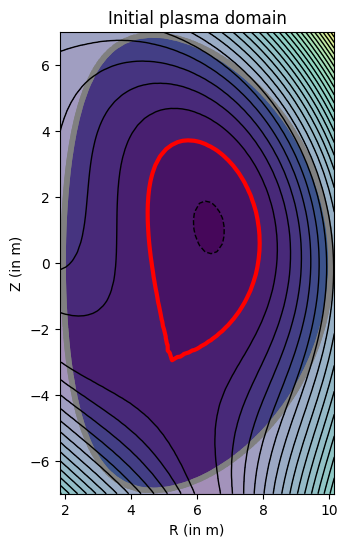

In [5]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

import numpy as np
"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

"""
X_SADDLE = np.array([5.4, -2.9])
X_RIGHT = np.array([7.8, 0.4])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.4])
"""

"""
X_SADDLE = np.array([5.3, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])
"""

X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Equilibrium.initialPHI.Plot()

In [6]:
Equilibrium.InitialiseDomainDiscretisation()

INITIALISE ELEMENTAL DISCRETISATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.009911838577926838 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1509001282716776 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·26.507598408388887
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Warning:  Element 2457: error in integration quadrature.
Done!
Done!


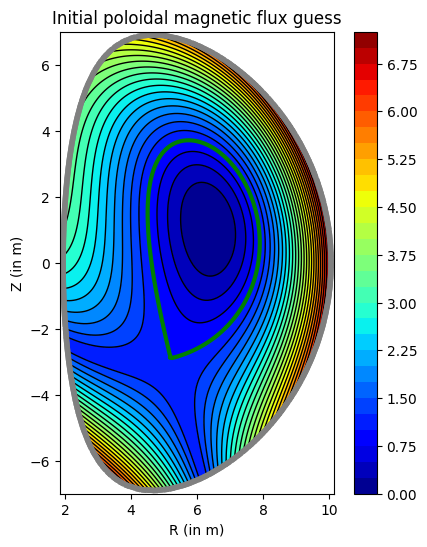

In [7]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])  # POINT ON TOP
"""

"""
X_SADDLE = np.array([5.4, -2.9])
X_RIGHT = np.array([7.8, 0.4])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.4])
"""

"""
X_SADDLE = np.array([5.3, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])
"""

X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

Equilibrium.initialPSI.Plot()

In [8]:
Equilibrium.InitialisePSI()

INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
Done!


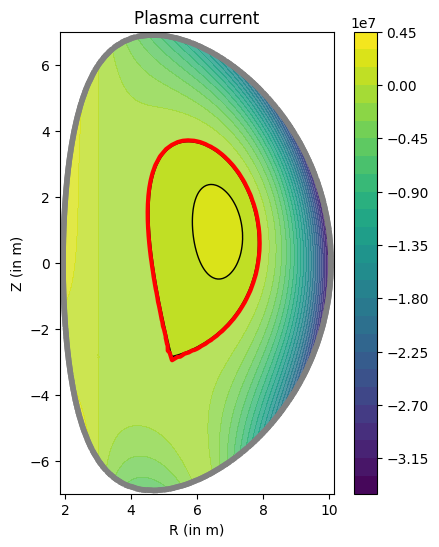

In [9]:
### DEFINE PLASMA CURRENT MODEL

# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi)

Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE PSI_B...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Done!
     -> ASSIGN INITIAL BOUNDARY VALUES...Done!
Done!
WRITE INITIAL SIMULATION DATA...Done!


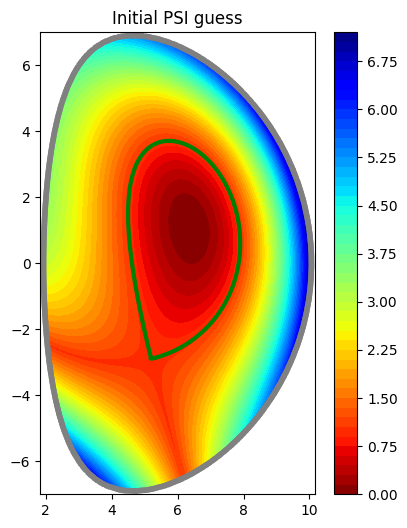

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999836
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.44624527, 0.81983482]), -10.395335728563554, 7410)]
Xpoint =  [(array([ 5.0391149 , -3.45520902]), 0.34153195446555623, 2357)]
LOCAL EXTREMUM AT  [6.44624527 0.81983482]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -10.395335728563554
SADDLE POINT AT  [ 5.0391149  -3.45520902]  (ELEMENT  2357 ) WITH VALUE PSI_X =  0.34153195446555623


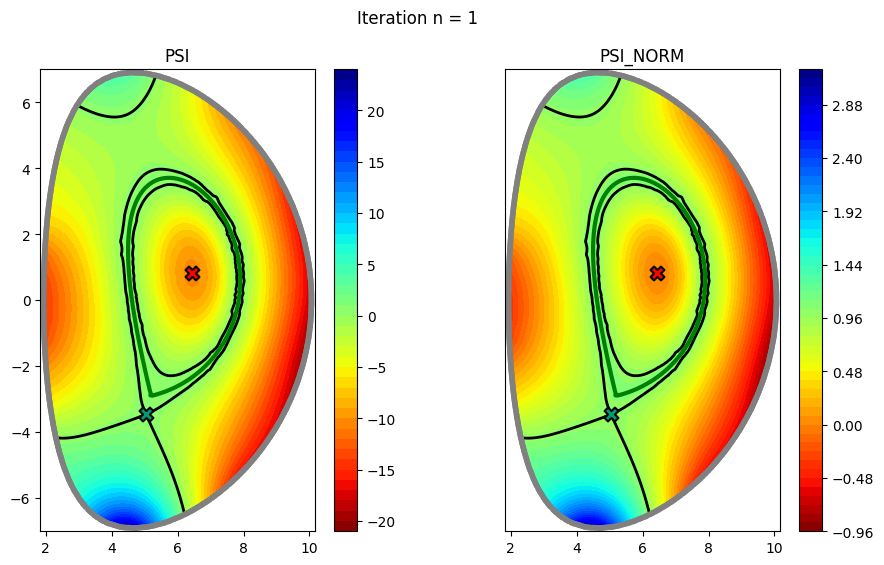

Internal iteration =  1 , PSI_NORM residu =  3.0604854058751827
 
Plasma region unchanged: distance between consecutive saddle points =  0.05946601786567567
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  14999999.999999836
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.446249  , 0.81983822]), -11.054439378793598, 7410)]
Xpoint =  [(array([ 5.05718619, -3.37203786]), -0.08566355024336077, 2357)]
LOCAL EXTREMUM AT  [6.446249   0.81983822]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -11.054439378793598
SADDLE POINT AT  [ 5.05718619 -3.37203786]  (ELEMENT  2357 ) WITH VALUE PSI_X =  -0.08566355024336077


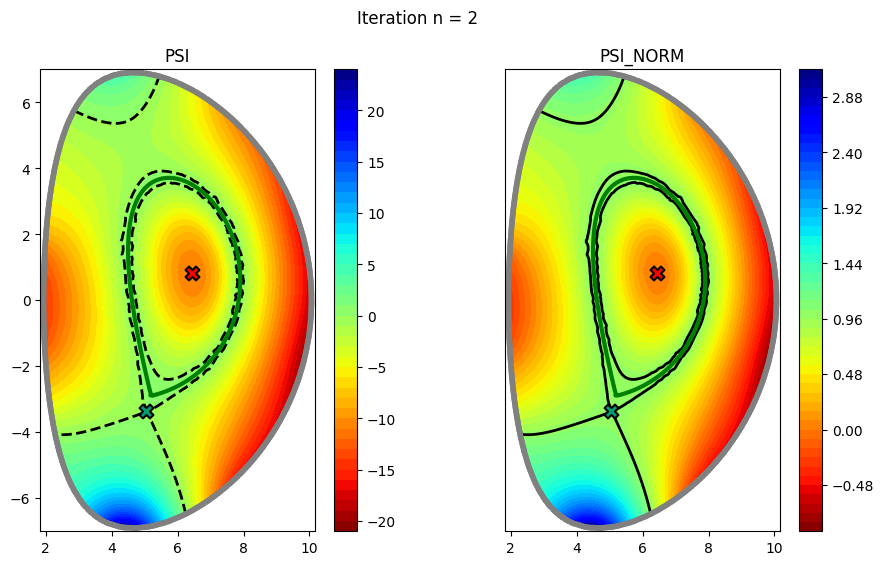

Internal iteration =  2 , PSI_NORM residu =  0.03932080804443524
 
Plasma region unchanged: distance between consecutive saddle points =  0.14015908673520583
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  15000000.000000028
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.46146665, 0.74293347]), -13.555766942516343, 7408)]
Xpoint =  [(array([ 5.07260147, -3.31211151]), -0.3799593499917522, 2443)]
LOCAL EXTREMUM AT  [6.46146665 0.74293347]  (ELEMENT  7408 ) WITH VALUE PSI_0 =  -13.555766942516343
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


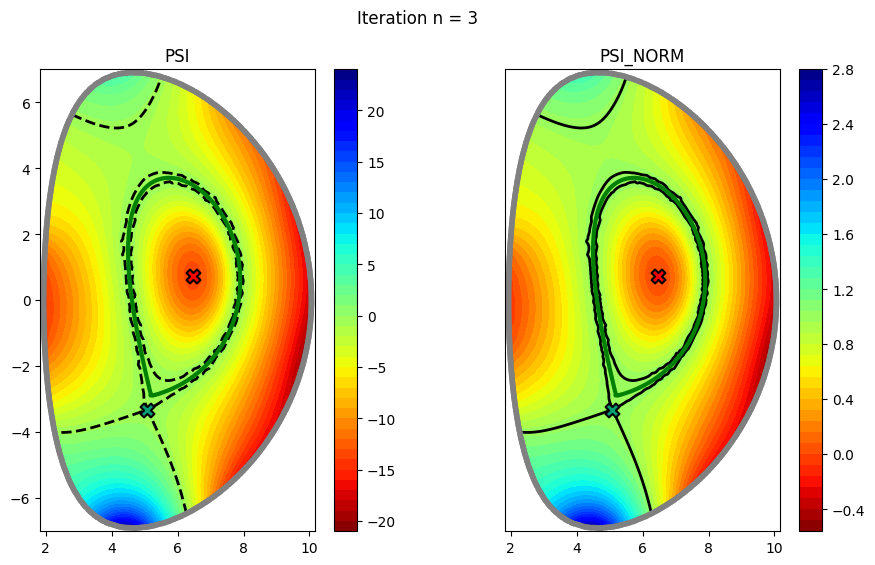

Internal iteration =  3 , PSI_NORM residu =  0.1340977701101851
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  14999999.999999912
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.48477347, 0.77259978]), -14.815643370587265, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.48477347 0.77259978]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -14.815643370587265
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


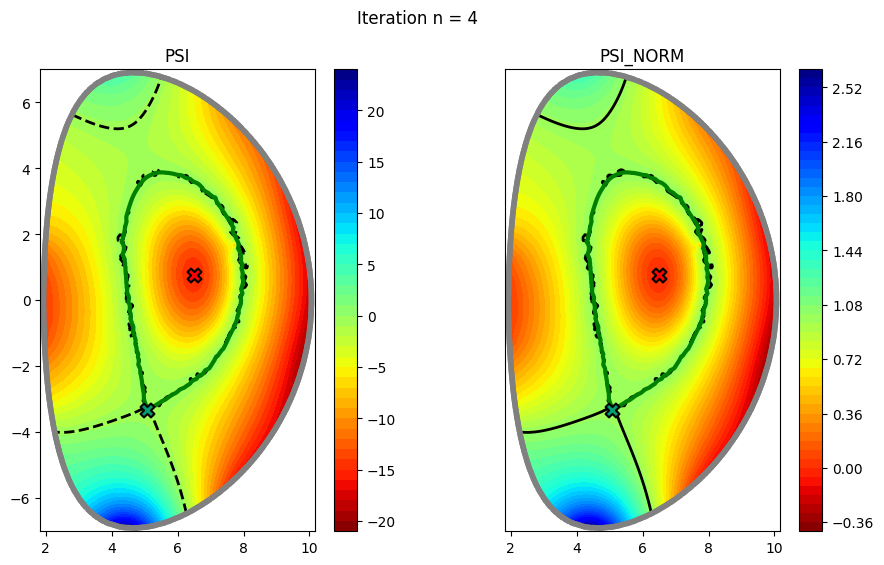

Internal iteration =  4 , PSI_NORM residu =  0.07058408788626577
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.000000212
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.49057921, 0.7370806 ]), -14.92424771952686, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.49057921 0.7370806 ]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -14.92424771952686
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


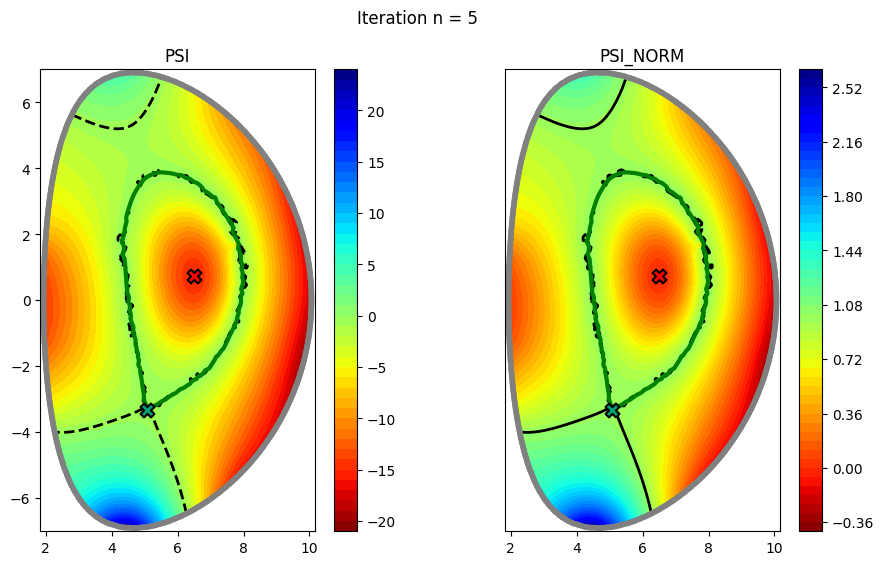

Internal iteration =  5 , PSI_NORM residu =  0.006268656109785825
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  15000000.000000007
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.50434774, 0.76124705]), -13.62170546560806, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.50434774 0.76124705]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.62170546560806
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


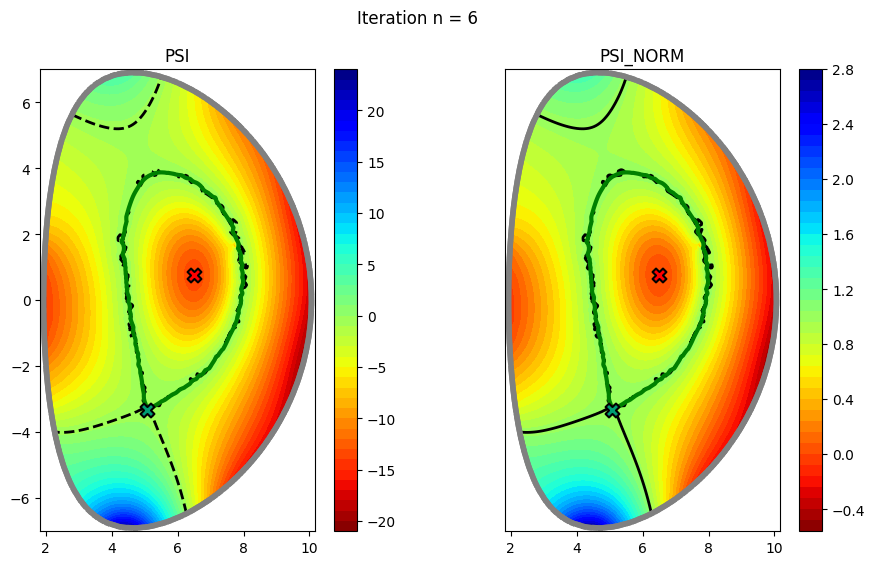

Internal iteration =  6 , PSI_NORM residu =  0.05477239172049807
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  15000000.00000002
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.50654   , 0.74408563]), -13.688088868102707, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.50654    0.74408563]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.688088868102707
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


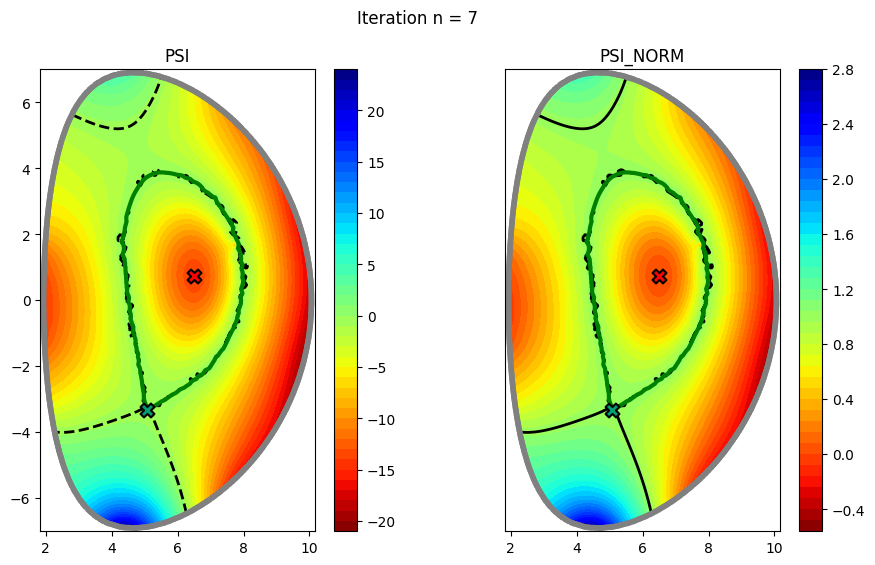

Internal iteration =  7 , PSI_NORM residu =  0.0035879741293667958
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  14999999.999999845
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.5108442 , 0.75611763]), -13.491459217505334, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.5108442  0.75611763]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.491459217505334
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


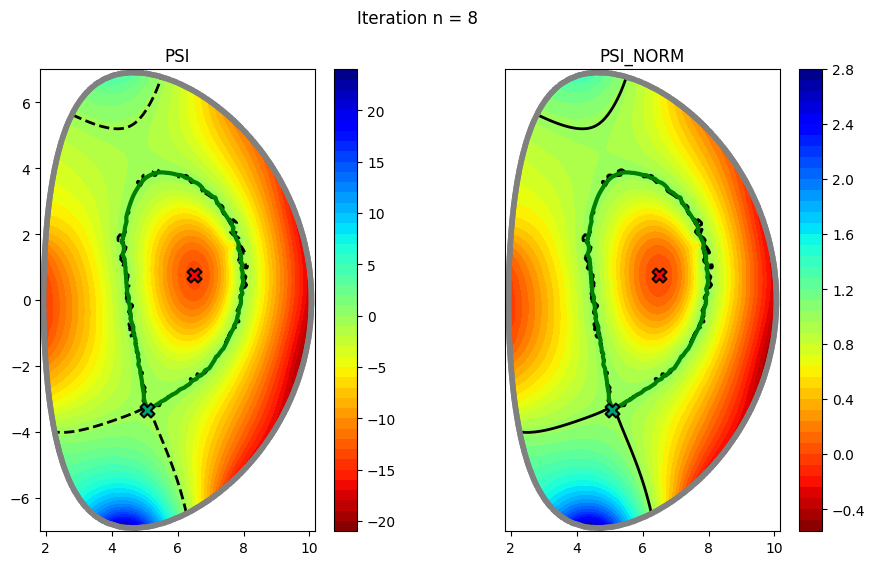

Internal iteration =  8 , PSI_NORM residu =  0.009273114807115
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  14999999.9999999
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51163146, 0.74789763]), -13.51142629400589, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51163146 0.74789763]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.51142629400589
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


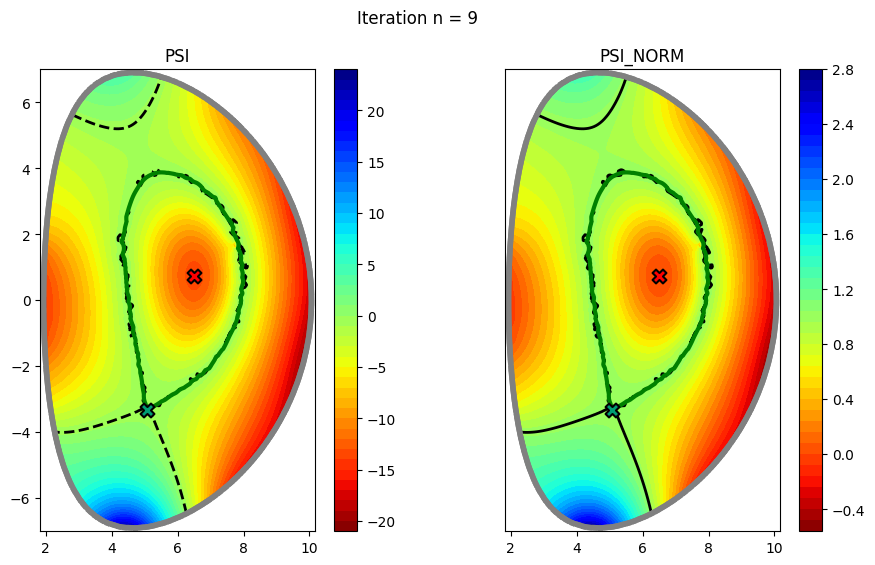

Internal iteration =  9 , PSI_NORM residu =  0.0012614960684700653
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 1 , INNER ITERATION = 10
     Total current =  15000000.000000166
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51268426, 0.75309274]), -13.466602217135694, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51268426 0.75309274]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.466602217135694
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


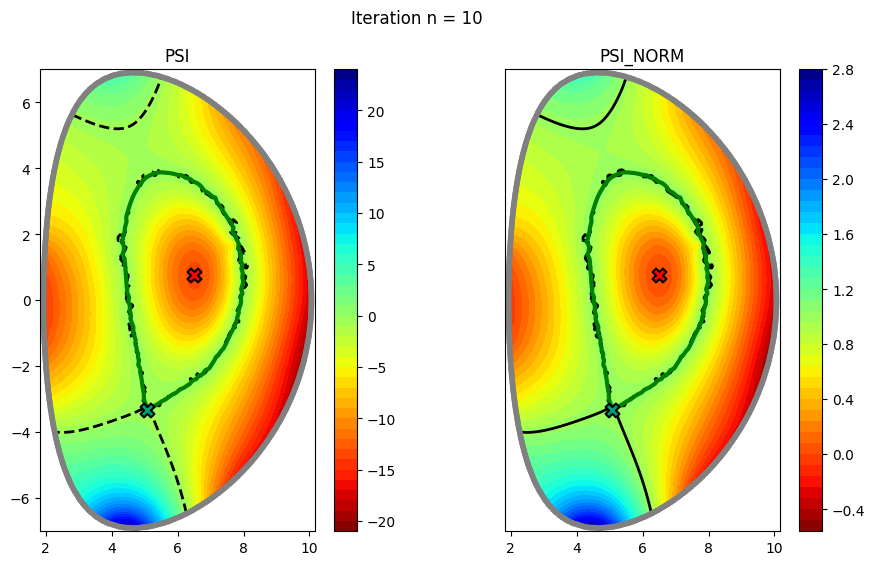

Internal iteration =  10 , PSI_NORM residu =  0.0021877470696000092
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.024520147297166433
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  14999999.999999836
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.5129662 , 0.74915261]), -13.472192516168635, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.5129662  0.74915261]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.472192516168635
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


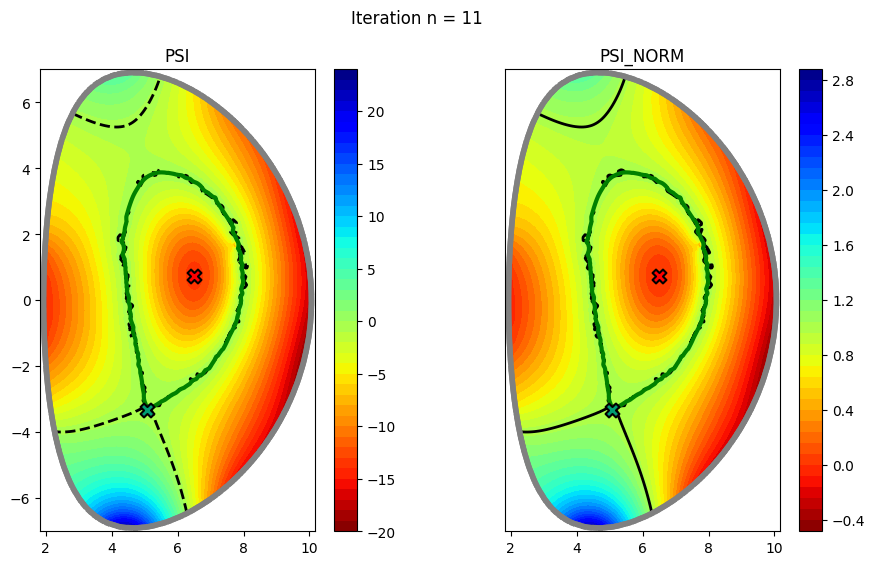

Internal iteration =  1 , PSI_NORM residu =  0.015538000988339426
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  15000000.000000041
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51318884, 0.75137971]), -13.460653798215729, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51318884 0.75137971]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.460653798215729
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


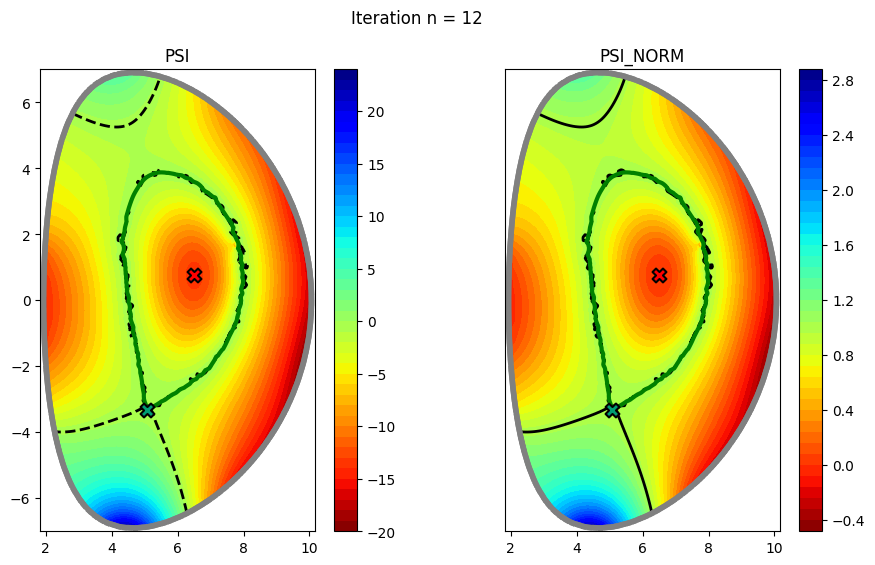

Internal iteration =  2 , PSI_NORM residu =  0.000578227071678663
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 2 , INNER ITERATION = 3
     Total current =  14999999.999999955
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51328582, 0.74948328]), -13.461993669987121, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51328582 0.74948328]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.461993669987121
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


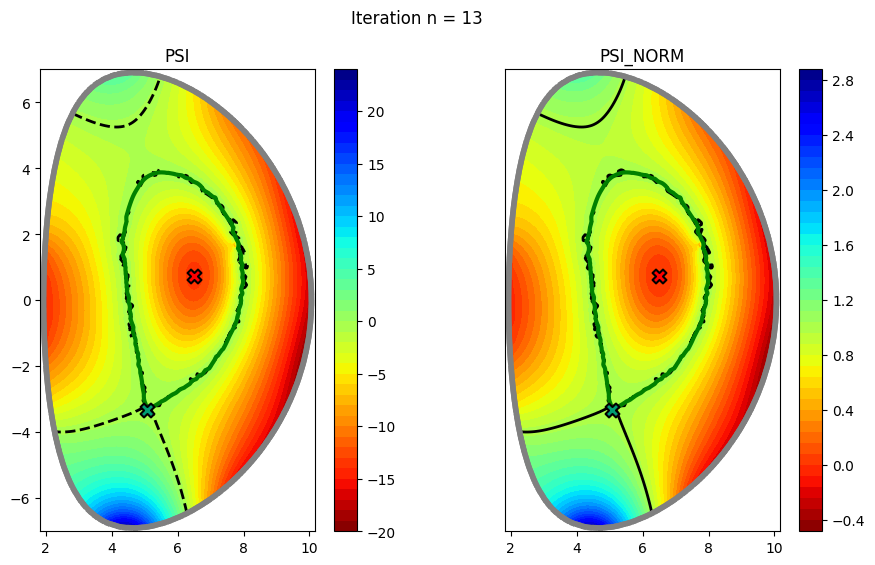

Internal iteration =  3 , PSI_NORM residu =  0.00019787539915460965
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 2 , INNER ITERATION = 4
     Total current =  15000000.000000125
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51332447, 0.75046736]), -13.458905419897988, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51332447 0.75046736]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.458905419897988
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


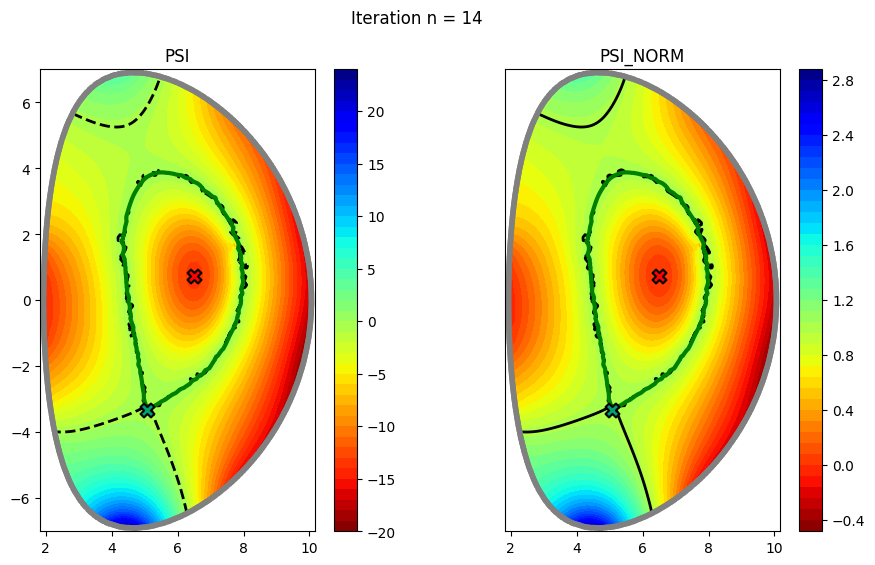

Internal iteration =  4 , PSI_NORM residu =  0.00017073887064297463
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 2 , INNER ITERATION = 5
     Total current =  15000000.000000048
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51335684, 0.74955106]), -13.45909901936071, 7410)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51335684 0.74955106]  (ELEMENT  7410 ) WITH VALUE PSI_0 =  -13.45909901936071
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.07260147 -3.31211151]  (ELEMENT  2443 ) WITH VALUE PSI_X =  -0.3799593499917522


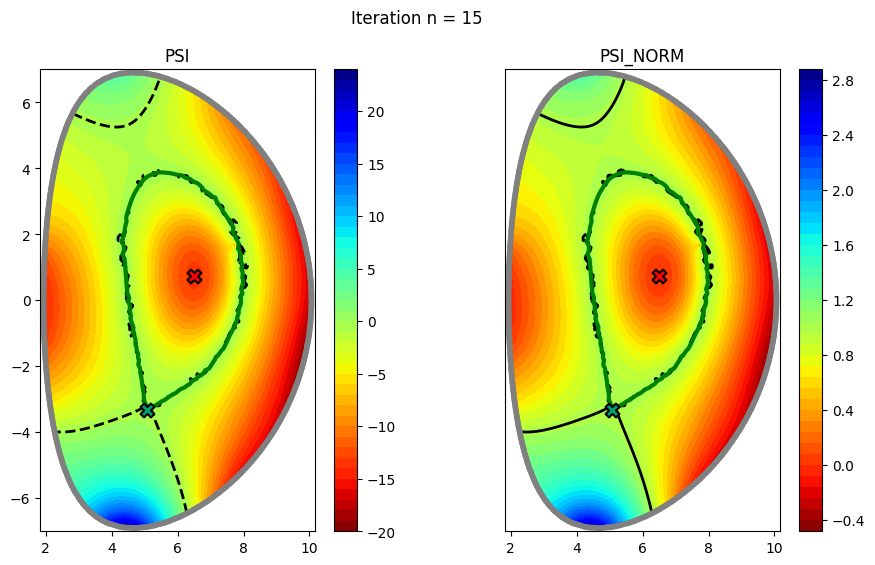

Internal iteration =  5 , PSI_NORM residu =  9.112656345414986e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  2 , PSI_B residu =  0.00011828117630062852
 
SOLUTION CONVERGED


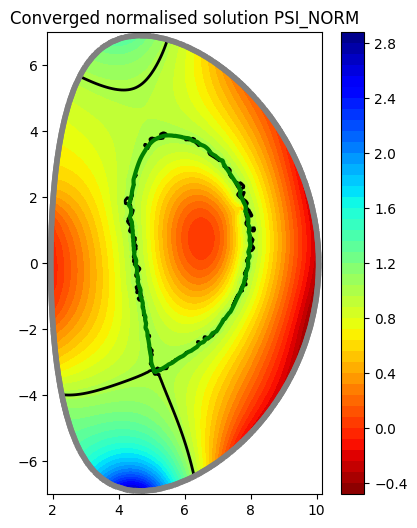

In [10]:
## NAME SIMULATION CASE 
CASE = "TS-FIXED-LINEAR-FEM"

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)